## Library imports

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Split

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

## Data Exploration

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

In [9]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

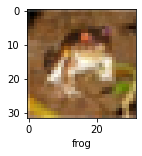

In [10]:
plot_sample(X_train, y_train, 0)

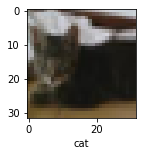

In [11]:
plot_sample(X_train, y_train, 9)

In [12]:
X_train = X_train/255
X_test = X_test/255

# Model Implementations

## Using Artificial Neural Network

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])
ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
ann.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 62s 39ms/step - loss: 1.8128 - accuracy: 0.3529
Epoch 2/20
1563/1563 [==============================] - 74s 47ms/step - loss: 1.6266 - accuracy: 0.4269
Epoch 3/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5429 - accuracy: 0.4555
Epoch 4/20
1563/1563 [==============================] - 60s 39ms/step - loss: 1.4813 - accuracy: 0.4781
Epoch 5/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4309 - accuracy: 0.4973
Epoch 6/20
1563/1563 [==============================] - 76s 49ms/step - loss: 1.3894 - accuracy: 0.5116
Epoch 7/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.3507 - accuracy: 0.5245
Epoch 8/20
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3144 - accuracy: 0.5387
Epoch 9/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2802 - accuracy: 0.5516
Epoch 10/20
1563/1563 [==============================] - 43s 28m

In [14]:
_,ann_accuracy = ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.3253 - accuracy: 0.5385


In [15]:
ann_accuracy

0.5385000109672546

In [16]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [17]:
y_pred

array([[0.6473416 , 0.2727586 , 0.85739946, ..., 0.00257169, 0.5386134 ,
        0.19036472],
       [0.9235522 , 0.96210784, 0.20037892, ..., 0.07012977, 0.9926191 ,
        0.9946844 ],
       [0.98021126, 0.8293903 , 0.21012466, ..., 0.6265179 , 0.9520162 ,
        0.95835865],
       ...,
       [0.17333178, 0.0149635 , 0.9590782 , ..., 0.2793514 , 0.36837116,
        0.19845481],
       [0.56021565, 0.06791686, 0.9064153 , ..., 0.14266276, 0.04059529,
        0.10349829],
       [0.54512674, 0.1967454 , 0.7012686 , ..., 0.90093446, 0.13816008,
        0.40958437]], dtype=float32)

In [18]:
y_pred_flat = []
for pred in y_pred:
    y_pred_flat.append(np.argmax(pred))

In [19]:
y_test_flat = y_test.reshape(-1,)

In [20]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_flat,y_pred_flat)

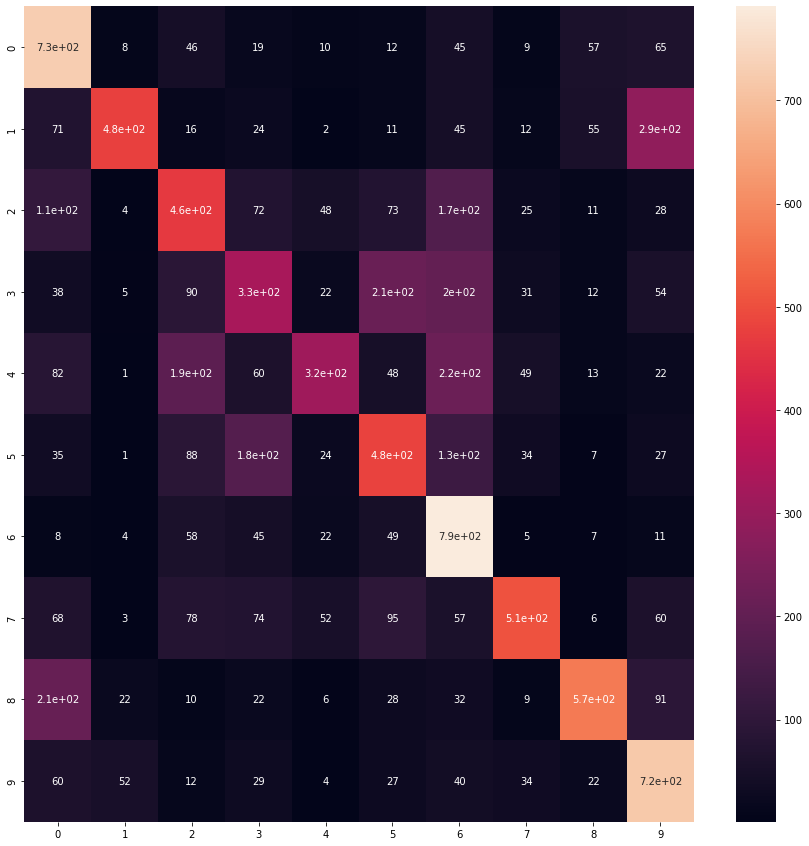

In [21]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(cnf_matrix, annot=True)
plt.show()

## Using Convolutional Neural Networks 

In [22]:
cnn = models.Sequential([
    #CNN Layers
    layers.Conv2D(filters = 32, kernel_size = (3,3),  activation ='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)), #max_pooling 2x2
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    
    #Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [23]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
cnn.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2675 - accuracy: 0.5502
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0999 - accuracy: 0.6159
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0151 - accuracy: 0.6474
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9571 - accuracy: 0.6672
Epoch 5/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9081 - accuracy: 0.6834
Epoch 6/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8718 - accuracy: 0.6970
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8348 - accuracy: 0.7101
Epoch 8/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8020 - accuracy: 0.7205
Epoch 9/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7749 - accuracy: 0.7295
Epoch 10/20
1563/1563 [==============================] - 20s 13m

In [26]:
_,cnn_accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0093 - accuracy: 0.6944


In [27]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [28]:
y_pred_flat = []
for pred in y_pred:
    y_pred_flat.append(np.argmax(pred))

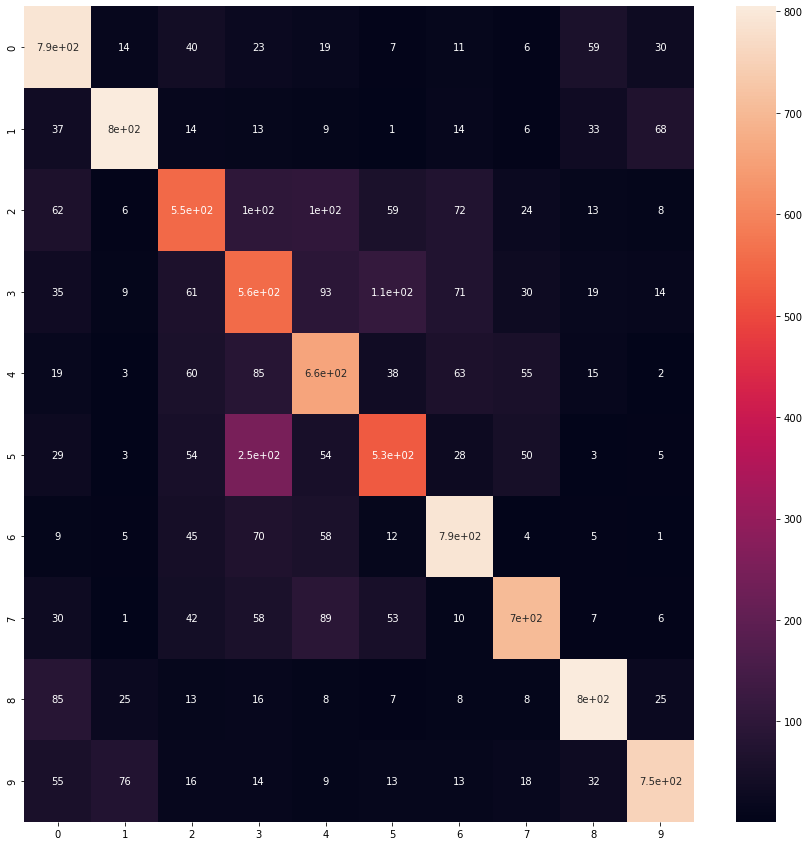

In [29]:
cnf_matrix = confusion_matrix(y_test_flat,y_pred_flat)
plt.figure(figsize = (15,15))
sns.heatmap(cnf_matrix, annot=True)
plt.show()

In [33]:
accuracy = [ann_accuracy, cnn_accuracy]
accuracy = [round(i*100) for i in accuracy]

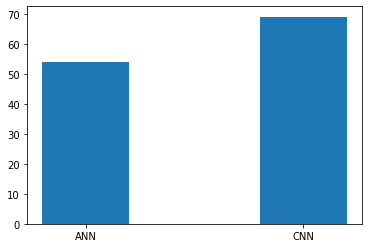

In [32]:
plt.bar(['ANN', 'CNN'], accuracy, width=0.4)
plt.show()